In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent); os.chdir(set_path)

In [13]:
from TargetDistributions.BayesianNN import PosteriorBNN
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.experimental.train_AIS import AIS_trainer
from FittedModels.utils import plot_history
import matplotlib.pyplot as plt
import torch
from TargetDistributions.MoG import MoG
from Utils import plot_func2D, MC_estimate_true_expectation, plot_distribution
from FittedModels.utils import plot_distributions, plot_samples

### Expectation Function

In [3]:
def expectation_function(x):
    A = torch.ones((x.shape[-1], x.shape[-1]))
    return torch.einsum("bi,ij,bj->b", x, A, x)

# Specifiy target distribution and key param

## BNN

In [4]:
epochs = 5
n_samples_estimation = int(1e4)
target = PosteriorBNN(n_datapoints=10, x_dim=2, y_dim=2, n_hidden_layers=2, layer_width=5)
dim = target.n_parameters

## MoG

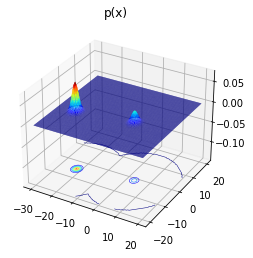

In [10]:
torch.manual_seed(2)
epochs = 500
dim = 2
n_samples_estimation = int(1e4)
target = MoG(dim=dim, n_mixes=2, min_cov=1, loc_scaling=10)
fig = plot_distribution(target, bounds=[[-30, 20], [-20, 20]])

# DReG + AIS

In [16]:
learnt_sampler = FlowModel(x_dim=dim) #, flow_type="RealNVP")
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=3, n_updates_Metropolis=2)

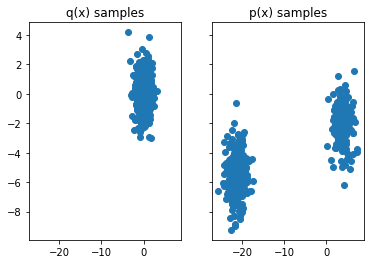

In [17]:
samples_fig_before = plot_samples(tester)

In [18]:
history = tester.train(1000, batch_size=100)

loss: -2.1837668418884277, mean log p_x -15.709999084472656:  86%|██████████████████████████████████████████████████████████████████████▍           | 859/1000 [02:29<00:24,  5.74it/s]


ValueError: The value argument must be within the support

In [ ]:
plot_history(history)

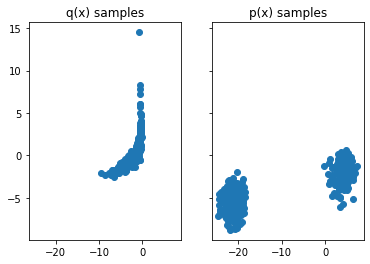

In [21]:
samples_fig_after = plot_samples(tester)

# DReG without AIS

In [ ]:
from FittedModels.train import LearntDistributionManager

# KL without AIS

In [ ]:
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling

In [ ]:
learnt_sampler = FlowModel(x_dim=dim)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="kl")
history = tester.train(epochs, batch_size=200)

In [ ]:
plot_history(history)
plt.show()

In [ ]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"effective sample size is {info['effective_sample_size']} \n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")